In [1]:
import os

import time
import multiprocessing
from nltk.corpus.reader.wordlist import WordListCorpusReader

from jgtextrank import keywords_extraction, keywords_extraction_from_corpus_directory
# load custom stop list
# The SMART stop-word list built by Chris Buckley and Gerard Salton, 
#   which can be obtained from http://www.lextek.com/manuals/onix/stopwords2.html
reader = WordListCorpusReader('../resource', 'smart-stop-list.txt')
stop_list = reader.words()

# Keywords extraction from text

In [2]:
example_abstract = "Compatibility of systems of linear constraints over the set of natural numbers. " \
                           "Criteria of compatibility of a system of linear Diophantine equations, strict inequations, " \
                           "and nonstrict inequations are considered. Upper bounds for components of a minimal set of " \
                           "solutions and algorithms of construction of minimal generating sets of solutions for all " \
                           "types of systems are given. These criteria and the corresponding algorithms for " \
                           "constructing a minimal supporting set of solutions can be used in solving all the " \
                           "considered types systems and systems of mixed types."
example_abstract_results, example_abstract_top_vertices = keywords_extraction(example_abstract, top_p = 0.3, lemma=True)
print("Keywords: \n")
print(example_abstract_results)        
print("\nTop T vertices: \n")
print(example_abstract_top_vertices)

Keywords: 

[('system', 0.09082), ('type system', 0.09082), ('minimal set', 0.07823), ('set', 0.07823), ('minimal supporting set', 0.07823), ('linear constraint', 0.07614), ('linear diophantine equation', 0.07614), ('corresponding algorithm', 0.06401), ('algorithm', 0.06401), ('minimal', 0.05851), ('strict inequations', 0.05081), ('nonstrict inequations', 0.05081)]

Top T vertices: 

[('system', 0.09082372985445038), ('set', 0.07823263636937204), ('linear', 0.0761400518605425), ('algorithm', 0.06401465435982252), ('equation', 0.059672075249721034), ('minimal', 0.05851242690778921), ('inequations', 0.050806044291552124)]


In [3]:
example_text_2 = "Information extraction is the process of extracting structured data from unstructured text, " \
                     "which is relevant for several end-to-end tasks, including question answering. " \
                     "This paper addresses the tasks of named entity recognition (NER), " \
                     "a subtask of information extraction, using conditional random fields (CRF). " \
                     "Our method is evaluated on the ConLL-2003 NER corpus."

example_text_2_results, example_text_2_top_vertices = keywords_extraction(example_text_2, top_p = 0.3)
print("Keywords: \n")
print(example_text_2_results)        
print("\nTop T vertices: \n")
print(example_text_2_top_vertices)

Keywords: 

[('several end-to-end tasks', 0.06839), ('conditional random fields', 0.06839), ('information extraction', 0.06779), ('unstructured text', 0.06779), ('conll-2003 ner corpus', 0.06606), ('ner', 0.06606), ('entity recognition', 0.04956), ('question answering', 0.04662)]

Top T vertices: 

[('fields', 0.06838889207498833), ('several', 0.06838889207498831), ('information', 0.06779131093059416), ('unstructured', 0.06779131093059416), ('ner', 0.06606231198616362), ('recognition', 0.04955562821923208), ('question', 0.04662004662004661)]


# Custom context window size

Co-occurrence graph is build with default context windows size 2. A different window size can be set.

In [4]:
# set to a larger context window size
example_results_with_custom_ctx_size, example_abstract_top_vertices = keywords_extraction(example_abstract, window=5, 
                                                                                          top_p = 0.3, lemma=True)
print("Keywords with context window size(=5) :", example_results_with_custom_ctx_size)

Keywords with context window size(=5) : [('minimal set', 0.09395), ('set', 0.09395), ('minimal supporting set', 0.09395), ('system', 0.08126), ('type system', 0.08126), ('linear constraint', 0.06484), ('linear diophantine equation', 0.06484), ('minimal', 0.06142), ('corresponding algorithm', 0.05936), ('algorithm', 0.05936), ('solution', 0.05828), ('strict inequations', 0.05165), ('nonstrict inequations', 0.05165)]


# Custom syntactic filters

In [5]:
# custom syntactic filters to include verbs
custom_categories = {'NNS', 'NNP', 'NN', 'JJ', 'VBZ'}

# custom stop words filters
stop_words={'set', 'mixed', 'corresponding', 'supporting'}

# extract keywords from all vertices connections
results_with_custom_filters, example_top_vertices = keywords_extraction(example_abstract, top_p = 1, 
                                                                        syntactic_categories = custom_categories, 
                                                                        stop_words = stop_words,
                                                                        lemma=True)
print("Keywords result with custom filters: ", results_with_custom_filters)

Keywords result with custom filters:  [('system', 0.08862), ('type system', 0.08862), ('linear diophantine equation', 0.08538), ('linear constraint', 0.08538), ('upper bound', 0.07337), ('construction', 0.06491), ('algorithm', 0.06491), ('strict inequations', 0.05443), ('nonstrict inequations', 0.05443), ('compatibility', 0.0512), ('natural number', 0.05), ('component', 0.03832), ('minimal', 0.03509), ('solution', 0.03509), ('criterion', 0.02926), ('type', 0.02633)]


# Custom co-occurrence context

'jgTextRank' build word co-occurrences from sentential context by default. Depending on specific corpus and hypothesis, the word co-occurrence context can also be within a paragraph, section, adjacent sentences, current document or any specific semantic frames from text.

Co-occurrence context can be customised in 'jgTextRank'. Following simple example shows how to extract keywords from pre-segmented corpus context.

In [6]:
from jgtextrank.core import keywords_extraction_from_segmented_corpus
# the "example context" is segmented into a list of 3 separate context
# see also 'keywords_extraction_from_tagged_corpus' for pre-segmented and pre-tagged corpus as input
example_user_defined_context_corpus = [["Compatibility", "of", "systems", "of", "linear", "constraints",
                                             "over", "the", "set", "of", "natural", "numbers",".",
                                             "Criteria", "of", "compatibility", "of", "a", "system", "of",
                                             "linear", "Diophantine", "equations", ",", "strict", "inequations", ",",
                                             "and", "nonstrict", "inequations", "are", "considered", "."],
                                            ["Upper", "bounds", "for", "components", "of", "a", "minimal", "set",
                                             "of", "solutions", "and","algorithms","of", "construction", "of",
                                             "minimal", "generating", "sets", "of", "solutions", "for", "all",
                                             "types", "of", "systems", "are", "given", "."],
                                            ["These", "criteria", "and", "the", "corresponding", "algorithms",
                                             "for", "constructing", "a", "minimal", "supporting", "set", "of",
                                             "solutions", "can", "be", "used", "in", "solving", "all", "the",
                                             "considered", "types", "systems", "and", "systems", "of", "mixed",
                                             "types","."]]
results_with_custom_context, top_vertices = keywords_extraction_from_segmented_corpus(example_user_defined_context_corpus,
                                                                                      top_p=1)
print("keywords from custom corpus context:", results_with_custom_context)
print("\ntop vertices from custom corpus context: ", top_vertices)

keywords from custom corpus context: [('systems', 0.07958), ('minimal', 0.06362), ('set', 0.06361), ('algorithms', 0.05406), ('solutions', 0.04964), ('linear constraints', 0.04358), ('types systems', 0.03979), ('criteria', 0.03779), ('compatibility', 0.03606), ('construction', 0.0352), ('types', 0.03472), ('sets', 0.03405), ('minimal set', 0.03181), ('linear diophantine equations', 0.02905), ('corresponding algorithms', 0.02703), ('strict inequations', 0.02328), ('nonstrict inequations', 0.02328), ('system', 0.02125), ('minimal supporting set', 0.02121), ('natural numbers', 0.01893), ('mixed types', 0.01736), ('components', 0.00644), ('upper', 0.00644)]

top vertices from custom corpus context:  [('linear', 0.08716454033846273), ('systems', 0.07958065089858095), ('minimal', 0.06361651491412551), ('set', 0.06360874993054699), ('equations', 0.05463841353047285), ('algorithms', 0.05405771103092074), ('solutions', 0.04963714471144737), ('inequations', 0.046554085569416453), ('strict', 0.04

# Visual Analytics of Co-occurrence Graph

'jgTextRank' supports various different custom settings including syntactic filters, stopwords, top T vertices, context window size, building co-occurrence connections from either original context text or filtered context, pageRank solver, and so forth. It would be a good idea to gain insights from visual analysis of the corresponding co-occurrence graph with actual samples.

Following code presents a simple example of how to visualise co-occurrence graph from your sample text.

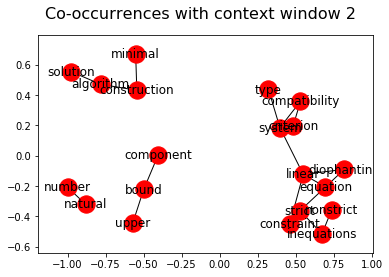

In [7]:
from jgtextrank.core import preprocessing, build_cooccurrence_graph
import networkx as nx
import matplotlib.pyplot as plt

preprocessed_context = preprocessing(example_abstract, syntactic_categories = custom_categories, 
                                     stop_words = stop_words, lemma=True)

cooccurrence_graph, original_tokenised_context = build_cooccurrence_graph(preprocessed_context)
pos = nx.spring_layout(cooccurrence_graph,k=0.20,iterations=20)
nx.draw_networkx(cooccurrence_graph, pos=pos, arrows=True, with_labels=True)
plt.suptitle('Co-occurrences with context window 2', fontsize=16)
plt.show()

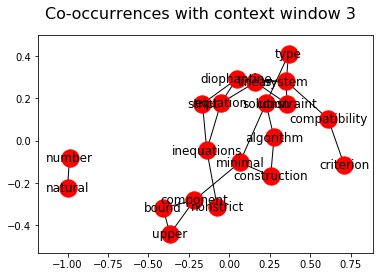

In [8]:
# set to a larger context size
preprocessed_context = preprocessing(example_abstract, syntactic_categories = custom_categories, 
                                     stop_words = stop_words, lemma=True)

cooccurrence_graph, original_tokenised_context = build_cooccurrence_graph(preprocessed_context, window=3)
pos = nx.spring_layout(cooccurrence_graph,k=0.20,iterations=20)
nx.draw_networkx(cooccurrence_graph, pos=pos, arrows=True, with_labels=True)
plt.suptitle('Co-occurrences with context window 3', fontsize=16)
plt.show()

# Multi-Word Term (MWT) Scoring


Multi-Word Terms(MWTs) are commonly weighted based on the maximum value of vertix unit among all the vertices in TextRank. jgTextRank implemented 11 additional algorithms. See all the scoring options as below:

* **'max'** : maximum value of vertices weights
* **'avg'** : avarage vertices weight
* **'sum'** : sum of vertices weights
* **'norm_max'** : MWT unit size normalisation of 'max' weight
* **'norm_avg'** : MWT unit size normalisation of 'avg' weight
* **'norm_sum'** : MWT unit size normalisation of 'sum' weight
* **'log_norm_max'** : logarithm based normalisation of 'max' weight
* **'log_norm_avg'** : logarithm based normalisation of 'avg' weight
* **'log_norm_sum'** : logarithm based normalisation of 'sum' weight
* **'gaussian_norm_max'** : gaussian normalisation of 'max' weight
* **'gaussian_norm_avg'** : gaussian normalisation of 'avg' weight
* **'gaussian_norm_sum'** : gaussian normalisation of 'sum' weight 

**'max'** is the default weighting metric for short-text keyword extraction in _'jgTextRank'_, while **'norm_max'** is the default one used for corpus based term extraction methods. The purpose of normalisation methods intend to penalise longer candidate terms and rank terms with desired term size higher.

Logarithm and Gaussian normalisations are two new experimental metrics implemented in _'jgTextRank'_. The following section briefly presents the intuition of two methods.

## Intuition of logarithm and Gaussian normalisation

Following two figures illustrates the intuition of two normalisation methods: 'log\_norm' and 'gaussian_norm'.

Both two methods attempt to penalise long candidate terms based a _"mean" value_ of term size distribution.

* **'log_norm'** intends to penalise candidate terms gradually that has longer size than the _"mean" value_, while rewarding the ones shorter than the point.

* **'gaussian_norm'** intends to treat the candidates terms with the _"mean"_ size as a central point of distribution and gradually penalise the terms far from the point.

The _"mean" size_ can be an actual mean of sizes of all candidate terms. The intuition is that we can set a "mean" value for our dataset and rank any candidate term higher with the observed term size. 'jgtextrank' allows to set the value manually and the default value is 5. This is based on last decades research that most of terminologies or key words concentrate on the size range from 1 to 6.

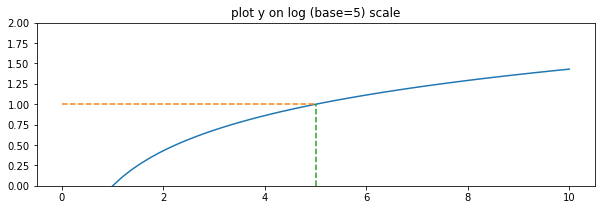

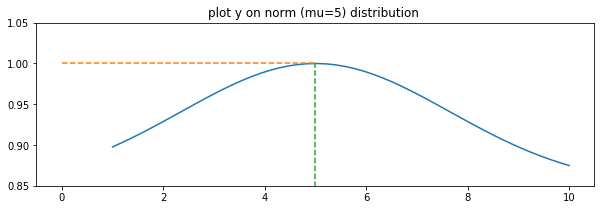

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import math

# set mean of terms size distribution
mu = 5

# sample x dataset as term sizes from 1 - 10
x = np.linspace(1,10)
y = [math.log(x_i, mu) for x_i in x]

fig, ax = plt.subplots(figsize=(10,3))

ax.set_title("plot y on log (base=5) scale")
#ax.set_yscale("log")
ax.set_ylim([0, 2])
ax.plot(x,y) 

plt.plot((0, 5), (1, 1), '--')
plt.plot((5, 5), (0, 1), '--')

plt.show()

# try with norm distribution
# mu = np.mean(x)
mu = 5
sigma = np.std(x)
sum_x = sum(x)
min_x = min(x)
max_x = max(x)

#print(np.sqrt(2))

def probability_density(x_value, mu, sigma):
    pd = (1/(sigma * np.sqrt(2 * math.pi))) * math.exp(- math.pow((x_value - mu),2) / (2 * math.pow(sigma, 2)))
    return pd

norm_value = 1 - probability_density(mu, mu, sigma)

n_y = [probability_density(x_i, mu, sigma) + norm_value for x_i in x]

# print("prob of 5: ", probability_density(5, mu, sigma))

fig_2, ax_2 = plt.subplots(figsize=(10,3))

ax_2.set_title("plot y on norm (mu=5) distribution ")
#ax.set_yscale("log")
ax_2.set_ylim([0.85, 1.05])
ax_2.plot(x,n_y) 

plt.plot((0, 5), (1, 1), '--')
plt.plot((5, 5), (0, 1), '--')

plt.show()

## Simple examples of MWT ranking

In [10]:
example_abstract_results_wc1, example_abstract_top_vertices = keywords_extraction(example_abstract, weight_comb="avg", top_p = 1, lemma=True)
print("Top 10 Keywords with 'avg': ", example_abstract_results_wc1[:10])

example_abstract_results_wc2, example_abstract_top_vertices = keywords_extraction(example_abstract, weight_comb="norm_avg", top_p = 1, lemma=True)
print("\nTop 10 Keywords with 'norm_avg': ", example_abstract_results_wc2[:10])

example_abstract_results_wc3, example_abstract_top_vertices = keywords_extraction(example_abstract, weight_comb="log_norm_avg", top_p = 1, mu=3, lemma=True)
print("\nTop 10 Keywords with 'log_norm_avg'(mu=3): ", example_abstract_results_wc3[:10])

example_abstract_results_wc4, example_abstract_top_vertices = keywords_extraction(example_abstract, weight_comb="gaussian_norm_avg", top_p = 1, mu=3, lemma=True)
print("\nTop 10 Keywords with 'gaussian_norm_avg'(mu=3): ", example_abstract_results_wc4[:10])

example_abstract_results_wc5, example_abstract_top_vertices = keywords_extraction(example_abstract, weight_comb="sum", top_p = 1, lemma=True)
print("\nTop 10 Keywords with 'sum': ", example_abstract_results_wc5[:10])

example_abstract_results_wc6, example_abstract_top_vertices = keywords_extraction(example_abstract, weight_comb="norm_sum", top_p = 1, lemma=True)
print("\nTop 10 Keywords with 'norm_sum': ", example_abstract_results_wc6[:10])

example_abstract_results_wc7, example_abstract_top_vertices = keywords_extraction(example_abstract, weight_comb="log_norm_sum", top_p = 1, mu=3, lemma=True)
print("\nTop 10 Keywords with 'log_norm_sum'(mu=3): ", example_abstract_results_wc7[:10])

example_abstract_results_wc8, example_abstract_top_vertices = keywords_extraction(example_abstract, weight_comb="gaussian_norm_sum", top_p = 1, mu=3, lemma=True)
print("\nTop 10 Keywords with 'gaussian_norm_sum'(mu=3): ", example_abstract_results_wc8[:10])

example_abstract_results_wc9, example_abstract_top_vertices = keywords_extraction(example_abstract, weight_comb="max", top_p = 1, lemma=True)
print("\nTop 10 Keywords with 'max': ", example_abstract_results_wc9[:10])

example_abstract_results_wc10, example_abstract_top_vertices = keywords_extraction(example_abstract, weight_comb="norm_max", top_p = 1, mu=3, lemma=True)
print("\nTop 10 Keywords with 'norm_max': ", example_abstract_results_wc10[:10])

example_abstract_results_wc11, example_abstract_top_vertices = keywords_extraction(example_abstract, weight_comb="log_norm_max", top_p = 1, mu=3, lemma=True)
print("\nTop 10 Keywords with 'log_norm_max'(mu=3): ", example_abstract_results_wc11[:10])

example_abstract_results_wc12, example_abstract_top_vertices = keywords_extraction(example_abstract, weight_comb="gaussian_norm_max", top_p = 1, mu=3, lemma=True)
print("\nTop 10 Keywords with 'gaussian_norm_max'(mu=3): ", example_abstract_results_wc12[:10])

Top 10 Keywords with 'avg':  [('system', 0.09082), ('set', 0.07823), ('minimal set', 0.06837), ('type system', 0.06496), ('algorithm', 0.06401), ('minimal supporting set', 0.05898), ('linear diophantine equation', 0.05864), ('minimal', 0.05851), ('linear constraint', 0.04968), ('strict inequations', 0.04809)]

Top 10 Keywords with 'norm_avg':  [('system', 0.09082), ('set', 0.07823), ('algorithm', 0.06401), ('minimal', 0.05851), ('compatibility', 0.04457), ('solution', 0.04169), ('construction', 0.04165), ('type', 0.03909), ('minimal set', 0.03419), ('type system', 0.03248)]

Top 10 Keywords with 'log_norm_avg'(mu=3):  [('minimal set', 0.10837), ('type system', 0.10296), ('system', 0.09082), ('linear constraint', 0.07875), ('set', 0.07823), ('strict inequations', 0.07622), ('corresponding algorithm', 0.07062), ('algorithm', 0.06401), ('nonstrict inequations', 0.06286), ('mixed type', 0.06196)]

Top 10 Keywords with 'gaussian_norm_avg'(mu=3):  [('system', 0.09027), ('set', 0.07775), ('al

# Term extraction from corpus

'jgtextrank' can be applied to raw text corpus for corpus-level term extraction. Corpus-level term graph representation will be made and linearly expanded by merging individual vertex graph and their co-occurrences from all the context across the entire document set.

The implementation is memory-efficient and can be applied to large corpus. You can set available workers (CPU cores) to speed up the co-occurrence computation.

In [11]:
import logging.config
# log can be set up for corpus processing or for the debugging
logging.config.fileConfig(os.path.join('..', 'logging.conf'))

In [12]:

corpus_directory = os.path.join('GENIAcorpus302', 'text', 'files')

print("term extraction from corpus [%s] ..." % corpus_directory)
start = time.time()

# "T is set to a third of the number of vertices in the graph"
# 'workers' is set to use all the available cpu cores
keywords, top_t_vertices = keywords_extraction_from_corpus_directory(corpus_directory,
                                                         top_p=1, stop_words=stop_list,
                                                         lemma=True, weight_comb="norm_max",
                                                         export=True, export_format="json",
                                                         export_path="textrank_genia.json",
                                                         workers=multiprocessing.cpu_count())

end = time.time()

print("\n")
print("Complete. Wall-clock elapsed time: ", end - start, "s")
print("\n")
print("top 50 keywords: ", keywords[:50])
print("\n")
print("top 50 vertices: ", top_t_vertices[:50])

term extraction from corpus [GENIAcorpus302\text\files] ...
2017-12-31 10:13:52,701 [MainThread  ] - textrank - INFO - computing vertices representations...
2017-12-31 10:15:52,338 [MainThread  ] - textrank - INFO - total size of vertices: 16121
2017-12-31 10:15:56,630 [MainThread  ] - textrank - DEBUG - top T(t=100) vertices: [('cell', 0.023948110403464038), ('protein', 0.012219775994005803), ('gene', 0.010030478323416008), ('expression', 0.007286230213382803), ('human', 0.006524408401121062), ('factor', 0.00612207339814623), ('activity', 0.005721538282275166), ('site', 0.005637743567407802), ('activation', 0.005599643960173472), ('receptor', 0.005050309207558882)] ...
2017-12-31 10:15:56,652 [MainThread  ] - textrank - INFO - collapse adjacent keywords ...
2017-12-31 10:17:37,760 [MainThread  ] - textrank - INFO - exporting sorted keywords into [textrank_genia.json]
2017-12-31 10:17:37,857 [MainThread  ] - textrank - INFO - complete result export.


Complete. Wall-clock elapsed time:

Evaluation of the result with reference set:

In [13]:
from example_utility import load_genia_gs_terms, normalise_term, term_precision, term_recall
gs_terms = load_genia_gs_terms('genia_gs_terms.txt')

load and normalise GENIA gs term list from [genia_gs_terms.txt]
initially loaded gs terms size:  35800
normalised gs terms loaded.


In [14]:
all_terms = [normalise_term(weighted_term[0]) for weighted_term in keywords]

print("Evaluation Result of GENIA dataset: ")
print("\n")
overall_precision = term_precision(gs_terms, set(all_terms))
print("overall precision: ", overall_precision)
overall_recall = term_recall(gs_terms, set(all_terms))
print("overall recall: ", overall_recall)
top_200_precision = term_precision(gs_terms, set(all_terms[:200]))
print("top_200_precision: ", top_200_precision)
top_500_precision = term_precision(gs_terms, set(all_terms[:500]))
print("top_500_precision: ", top_500_precision)
top_1000_precision = term_precision(gs_terms, set(all_terms[:1000]))
print("top_1000_precision: ", top_1000_precision)
top_2000_precision = term_precision(gs_terms, set(all_terms[:2000]))
print("top_2000_precision: ", top_2000_precision)
top_3000_precision = term_precision(gs_terms, set(all_terms[:3000]))
print("top_3000_precision: ", top_3000_precision)
top_5000_precision = term_precision(gs_terms, set(all_terms[:5000]))
print("top_5000_precision: ", top_5000_precision)

Evaluation Result of GENIA dataset: 


overall precision:  0.4051172707889126
overall recall:  0.356
top_200_precision:  0.6683417085427136
top_500_precision:  0.6519114688128773
top_1000_precision:  0.6092648539778449
top_2000_precision:  0.5742325113236034
top_3000_precision:  0.5535055350553506
top_5000_precision:  0.5422875553765606


## weight  MWTs with 'log_max_norm' :

In [15]:
print("\n")
print("start term extraction with 'log_norm_max' (mu=3) for MWT terms ...")
start = time.time()

# "T is set to a third of the number of vertices in the graph"
# 'workers' is set to use all the available cpu cores
keywords_log_norm, top_t_vertices_log_norm = keywords_extraction_from_corpus_directory(corpus_directory,
                                                         top_p=1, stop_words=stop_list,
                                                         lemma=True, weight_comb="log_norm_max", mu=3,
                                                         export=True, export_format="json",
                                                         export_path="textrank_genia.json",
                                                         workers=multiprocessing.cpu_count())

end = time.time()

print("\n")
print("Complete. Wall-clock elapsed time: ", end - start, "s")
print("\n")
print("top 30 keywords: ", keywords_log_norm[:30])
# print("\n")
# print("top 100 vertices: ", top_t_vertices[:100])
all_terms_log_norm = [normalise_term(weighted_term[0]) for weighted_term in keywords_log_norm]

print("\n")
print("Evaluation Result of GENIA dataset with 'log_norm_max' (mu=3): ")

overall_precision = term_precision(gs_terms, set(all_terms_log_norm))
print("overall precision: ", overall_precision)
overall_recall = term_recall(gs_terms, set(all_terms_log_norm))
print("overall recall: ", overall_recall)
top_200_precision = term_precision(gs_terms, set(all_terms_log_norm[:200]))
print("top_200_precision: ", top_200_precision)
top_500_precision = term_precision(gs_terms, set(all_terms_log_norm[:500]))
print("top_500_precision: ", top_500_precision)
top_1000_precision = term_precision(gs_terms, set(all_terms_log_norm[:1000]))
print("top_1000_precision: ", top_1000_precision)
top_2000_precision = term_precision(gs_terms, set(all_terms_log_norm[:2000]))
print("top_2000_precision: ", top_2000_precision)
top_3000_precision = term_precision(gs_terms, set(all_terms_log_norm[:3000]))
print("top_3000_precision: ", top_3000_precision)
top_5000_precision = term_precision(gs_terms, set(all_terms_log_norm[:5000]))
print("top_5000_precision: ", top_5000_precision)



start term extraction with 'log_norm_max' (mu=3) for MWT terms ...
2017-12-31 10:19:34,671 [MainThread  ] - textrank - INFO - computing vertices representations...
2017-12-31 10:21:36,056 [MainThread  ] - textrank - INFO - total size of vertices: 16121
2017-12-31 10:21:40,482 [MainThread  ] - textrank - DEBUG - top T(t=100) vertices: [('cell', 0.023948110403464038), ('protein', 0.012219775994005803), ('gene', 0.010030478323416008), ('expression', 0.007286230213382803), ('human', 0.006524408401121062), ('factor', 0.00612207339814623), ('activity', 0.005721538282275166), ('site', 0.005637743567407802), ('activation', 0.005599643960173472), ('receptor', 0.005050309207558882)] ...
2017-12-31 10:21:40,502 [MainThread  ] - textrank - INFO - collapse adjacent keywords ...
2017-12-31 10:23:25,018 [MainThread  ] - textrank - INFO - exporting sorted keywords into [textrank_genia.json]
2017-12-31 10:23:25,114 [MainThread  ] - textrank - INFO - complete result export.


Complete. Wall-clock elap

## weight  MWTs with "gaussian_norm_max"

In [16]:
print("\n")
print("start term extraction with 'gaussian_norm_max' (mu=5) for MWT terms ...")
start = time.time()

# "T is set to a third of the number of vertices in the graph"
# 'workers' is set to use all the available cpu cores
keywords_log_norm, top_t_vertices_log_norm = keywords_extraction_from_corpus_directory(corpus_directory,
                                                         top_p=1, stop_words=stop_list,
                                                         lemma=True, weight_comb="gaussian_norm_max", mu=5,
                                                         export=True, export_format="json",
                                                         export_path="textrank_genia.json",
                                                         workers=multiprocessing.cpu_count())

end = time.time()

print("\n")
print("Complete. Wall-clock elapsed time: ", end - start, "s")
print("\n")
print("top 30 keywords: ", keywords_log_norm[:30])
# print("\n")
# print("top 100 vertices: ", top_t_vertices[:100])
all_terms_log_norm = [normalise_term(weighted_term[0]) for weighted_term in keywords_log_norm]

print("\n")
print("Evaluation Result of GENIA dataset with 'gaussian_norm_max' (mu=5): ")

overall_precision = term_precision(gs_terms, set(all_terms_log_norm))
print("overall precision: ", overall_precision)
overall_recall = term_recall(gs_terms, set(all_terms_log_norm))
print("overall recall: ", overall_recall)
top_200_precision = term_precision(gs_terms, set(all_terms_log_norm[:200]))
print("top_200_precision: ", top_200_precision)
top_500_precision = term_precision(gs_terms, set(all_terms_log_norm[:500]))
print("top_500_precision: ", top_500_precision)
top_1000_precision = term_precision(gs_terms, set(all_terms_log_norm[:1000]))
print("top_1000_precision: ", top_1000_precision)
top_2000_precision = term_precision(gs_terms, set(all_terms_log_norm[:2000]))
print("top_2000_precision: ", top_2000_precision)
top_3000_precision = term_precision(gs_terms, set(all_terms_log_norm[:3000]))
print("top_3000_precision: ", top_3000_precision)
top_5000_precision = term_precision(gs_terms, set(all_terms_log_norm[:5000]))
print("top_5000_precision: ", top_5000_precision)



start term extraction with 'gaussian_norm_max' (mu=5) for MWT terms ...
2017-12-31 10:24:59,658 [MainThread  ] - textrank - INFO - computing vertices representations...
2017-12-31 10:27:16,615 [MainThread  ] - textrank - INFO - total size of vertices: 16121
2017-12-31 10:27:20,859 [MainThread  ] - textrank - DEBUG - top T(t=100) vertices: [('cell', 0.023948110403464038), ('protein', 0.012219775994005803), ('gene', 0.010030478323416008), ('expression', 0.007286230213382803), ('human', 0.006524408401121062), ('factor', 0.00612207339814623), ('activity', 0.005721538282275166), ('site', 0.005637743567407802), ('activation', 0.005599643960173472), ('receptor', 0.005050309207558882)] ...
2017-12-31 10:27:20,886 [MainThread  ] - textrank - INFO - collapse adjacent keywords ...
2017-12-31 10:28:57,199 [MainThread  ] - textrank - INFO - exporting sorted keywords into [textrank_genia.json]
2017-12-31 10:28:57,303 [MainThread  ] - textrank - INFO - complete result export.


Complete. Wall-clock

# Term extraction from pre-tagged corpus

Following example shows how to pre-process the corpus with [spaCy](https://spacy.io/).

To run the following demo, you need to :

    1) install spaCy ('pip install spacy');
    
    2) download the corresponding language model (e.g., 'python -m spacy download en');

In [17]:
from jgtextrank import keywords_extraction_from_tagged_corpus
from example_utility import pre_processing_corpus_with_spacy

corpus_directory = os.path.join('GENIAcorpus302', 'text', 'files')
# pre-processing raw corpus with spaCy library
pre_processed_corpus = pre_processing_corpus_with_spacy(corpus_directory, encoding="utf-8", lemma=True)

print("term extraction from spaCy pre-processed corpus [%s] ..." % corpus_directory)

# PoS tagging can be erroneous with domain-specific corpus. Custom stop list can be applied to improve precision
# stop_list = stop_list + ["regulate", "show", "activate", "express", "increase", "increased", "target", "demonstrate", "mimic", "exert", "acute"]

start = time.time()


keywords_spacy, top_t_vertices_spacy = keywords_extraction_from_tagged_corpus(pre_processed_corpus, window=2,
                                                                  top_p = 1, stop_words=stop_list,
                                                                  weight_comb="norm_max",
                                                                  export=True, export_format="json",
                                                                  export_path="textrank_genia_spacy.json",
                                                                  workers=multiprocessing.cpu_count())

end = time.time()

print("\n")
print("Complete. Wall-clock elapsed time: ", end - start, "s")
print("\n")
print("top 50 keywords: ", keywords_spacy[:50])
print("\n")
print("top 100 vertices: ", top_t_vertices_spacy[:100])


term extraction from spaCy pre-processed corpus [GENIAcorpus302\text\files] ...
2017-12-31 10:35:00,028 [MainThread  ] - textrank - INFO - computing vertices representations...
2017-12-31 10:36:33,040 [MainThread  ] - textrank - INFO - total size of vertices: 11302
2017-12-31 10:36:36,560 [MainThread  ] - textrank - DEBUG - top T(t=11302) vertices: [('cell', 0.02259906937549665), ('protein', 0.009352316939077296), ('gene', 0.007757374131964984), ('expression', 0.0070838554691529405), ('human', 0.006509913016572303), ('induce', 0.005632356590088859), ('factor', 0.005613458154663062), ('receptor', 0.005058091765301573), ('activity', 0.005052917635916724), ('site', 0.004854466911063564)] ...
2017-12-31 10:36:36,590 [MainThread  ] - textrank - INFO - collapse adjacent keywords ...
2017-12-31 10:39:20,757 [MainThread  ] - textrank - INFO - exporting sorted keywords into [textrank_genia_spacy.json]
2017-12-31 10:39:20,895 [MainThread  ] - textrank - INFO - complete result export.


Complete.

Evaluation of the result with reference set:

In [18]:
# results are normalised (punctuation removal and lower casing) for evaluation
all_terms_spacy = [normalise_term(weighted_term[0]) for weighted_term in keywords_spacy]

print("Evaluation Result with spaCy pre-processed GENIA dataset: ")
print("\n")

overall_precision_spacy = term_precision(gs_terms, set(all_terms_spacy))
print("overall_precision_spacy: ", overall_precision_spacy)
overall_recall_spacy = term_recall(gs_terms, set(all_terms_spacy))
print("overall recall_spacy: ", overall_recall_spacy)
top_200_precision_spacy = term_precision(gs_terms, set(all_terms_spacy[:200]))
print("top_200_precision_spacy: ", top_200_precision_spacy)
top_500_precision_spacy = term_precision(gs_terms, set(all_terms_spacy[:500]))
print("top_500_precision_spacy: ", top_500_precision_spacy)
top_1000_precision_spacy = term_precision(gs_terms, set(all_terms_spacy[:1000]))
print("top_1000_precision_spacy: ", top_1000_precision_spacy)
top_2000_precision_spacy = term_precision(gs_terms, set(all_terms_spacy[:2000]))
print("top_2000_precision_spacy: ", top_2000_precision_spacy)
top_3000_precision_spacy = term_precision(gs_terms, set(all_terms_spacy[:3000]))
print("top_3000_precision_spacy: ", top_3000_precision_spacy)
top_5000_precision_spacy = term_precision(gs_terms, set(all_terms_spacy[:5000]))
print("top_5000_precision_spacy: ", top_5000_precision_spacy)

Evaluation Result with spaCy pre-processed GENIA dataset: 


overall_precision_spacy:  0.34395678911310124
overall recall_spacy:  0.484
top_200_precision_spacy:  0.515
top_500_precision_spacy:  0.5370741482965932
top_1000_precision_spacy:  0.4759519038076152
top_2000_precision_spacy:  0.437875751503006
top_3000_precision_spacy:  0.42518370073480294
top_5000_precision_spacy:  0.40665730900340885
